In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

sb.set_style("whitegrid")
sb.set_palette("husl")

In [4]:
data = pd.read_csv('../data/btcusd_1-min_data.csv')

data.head()
print(data.columns)

data['Date'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Date', inplace=True)
# changing to daily timeframe cuz 1min too small
data_daily = data.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


AttributeError: module 'seaborn' has no attribute 'hisplot'

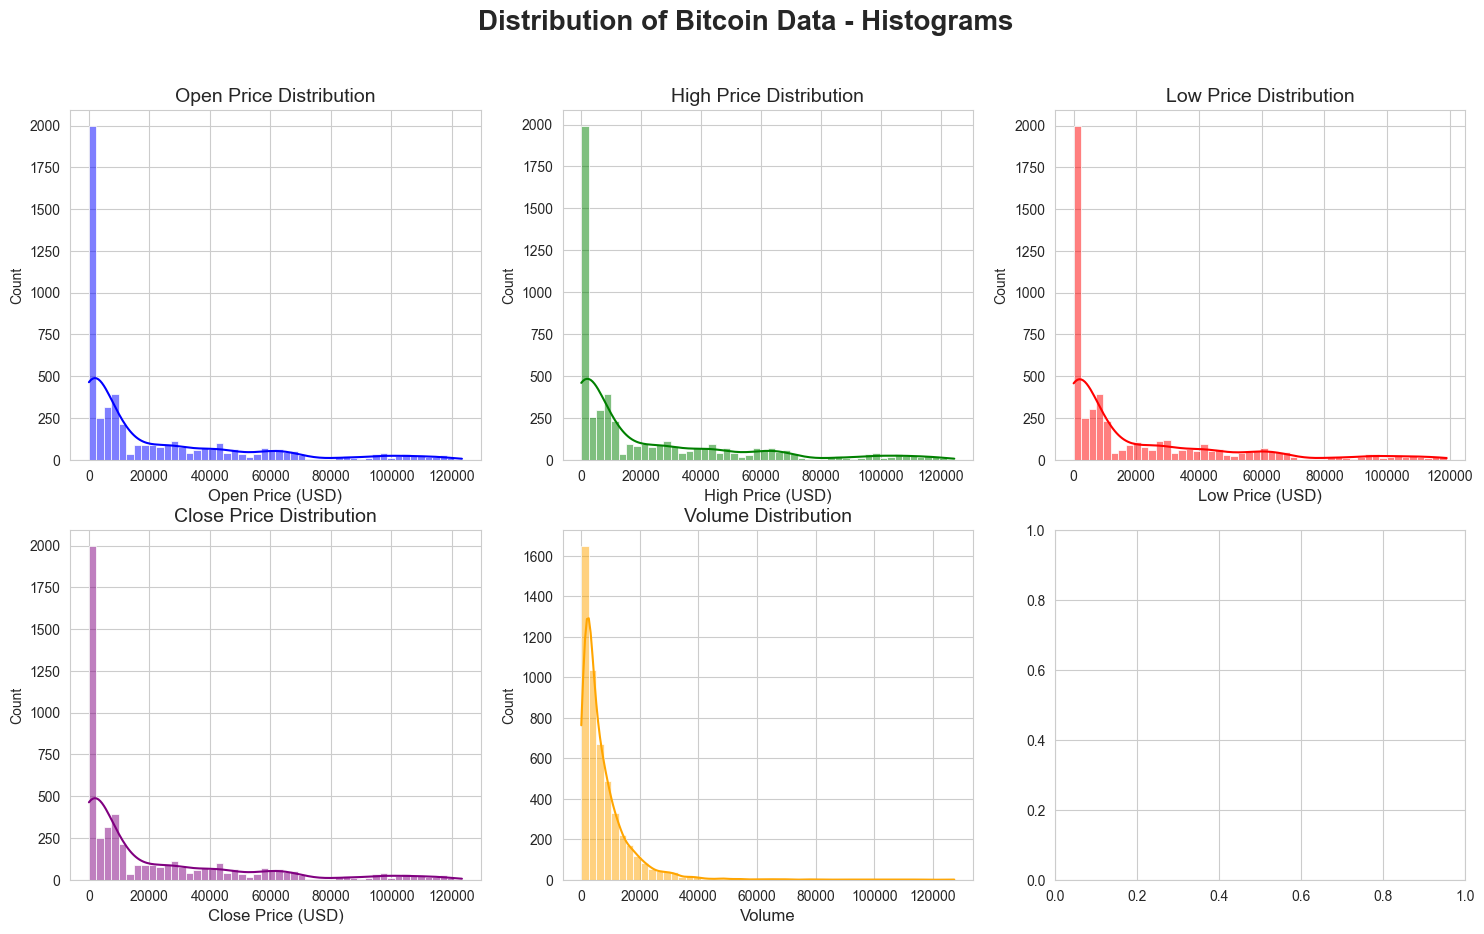

<Figure size 1800x800 with 0 Axes>

In [8]:
# Create histograms for all price columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Bitcoin Data - Histograms', fontsize=20, fontweight='bold')

# Open price
sb.histplot(data=data_daily, x='Open', kde=True, bins=50, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Open Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Open Price (USD)', fontsize=12)

# High price
sb.histplot(data=data_daily, x='High', kde=True, bins=50, color='green', ax=axes[0, 1])
axes[0, 1].set_title('High Price Distribution', fontsize=14)
axes[0, 1].set_xlabel('High Price (USD)', fontsize=12)

# Low price
sb.histplot(data=data_daily, x='Low', kde=True, bins=50, color='red', ax=axes[0, 2])
axes[0, 2].set_title('Low Price Distribution', fontsize=14)
axes[0, 2].set_xlabel('Low Price (USD)', fontsize=12)

# Close price
sb.histplot(data=data_daily, x='Close', kde=True, bins=50, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Close Price Distribution', fontsize=14)
axes[1, 0].set_xlabel('Close Price (USD)', fontsize=12)

# Volume
sb.histplot(data=data_daily, x='Volume', kde=True, bins=50, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Volume Distribution', fontsize=14)
axes[1, 1].set_xlabel('Volume', fontsize=12)

data_daily['Year'] = data_daily.index.year
# Close price by year
plt.figure(figsize=(18, 8))
sb.hisplot(data=data_daily, x='Volume', kde=True, bins=50, color='yellow', ax=axes[1, 1])
plt.title('Bitcoin Close Price Distribution by Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

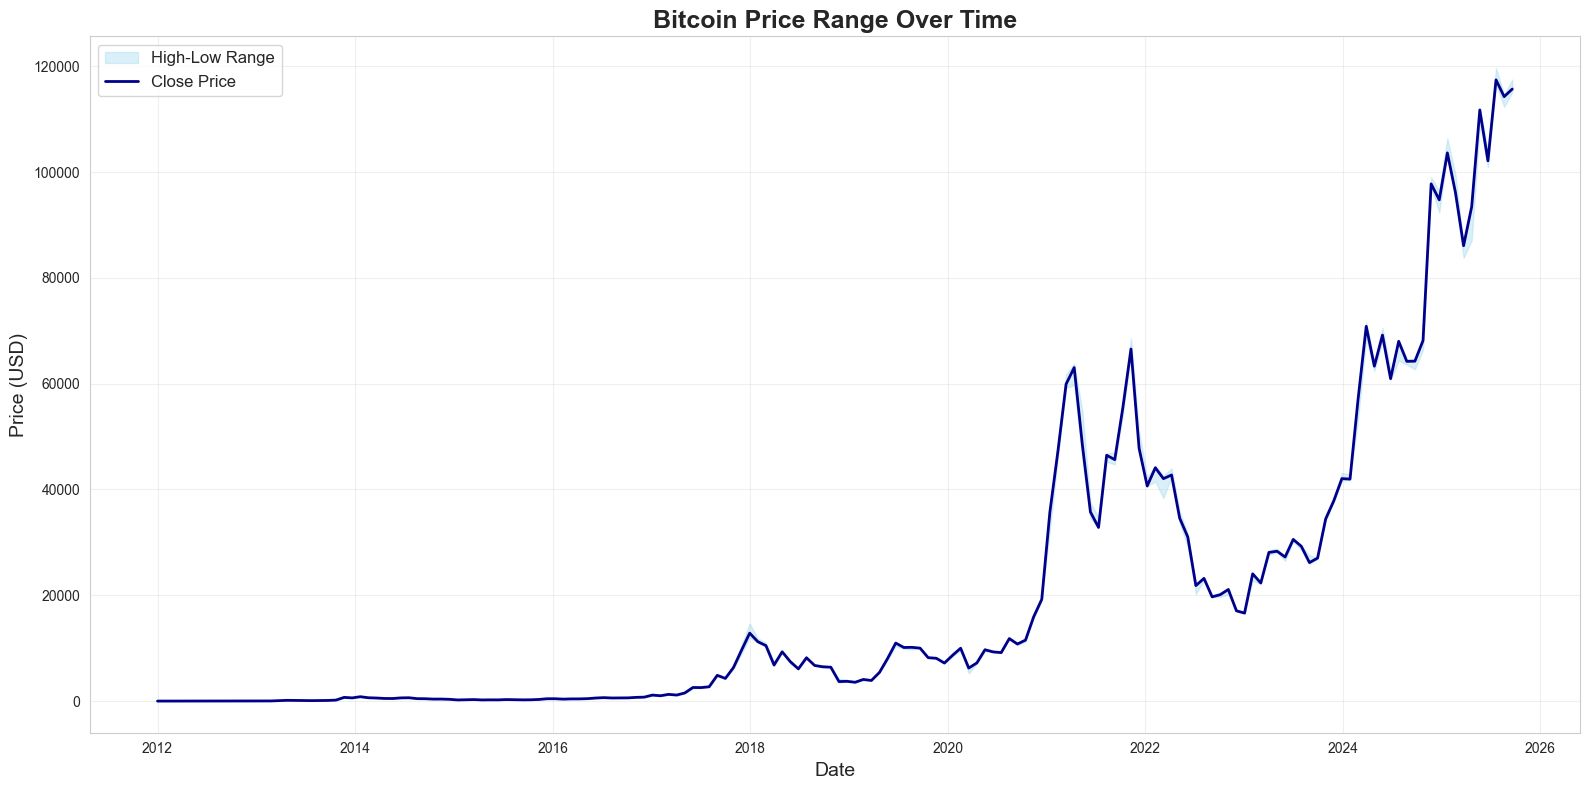

In [11]:
data_monthly = data_daily.iloc[::30]

plt.figure(figsize=(16, 8))
plt.fill_between(data_monthly.index, data_monthly['Low'], data_monthly['High'], 
                 alpha=0.3, label='High-Low Range', color='skyblue')
plt.plot(data_monthly.index, data_monthly['Close'], 
         linewidth=2, label='Close Price', color='darkblue')
plt.title('Bitcoin Price Range Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

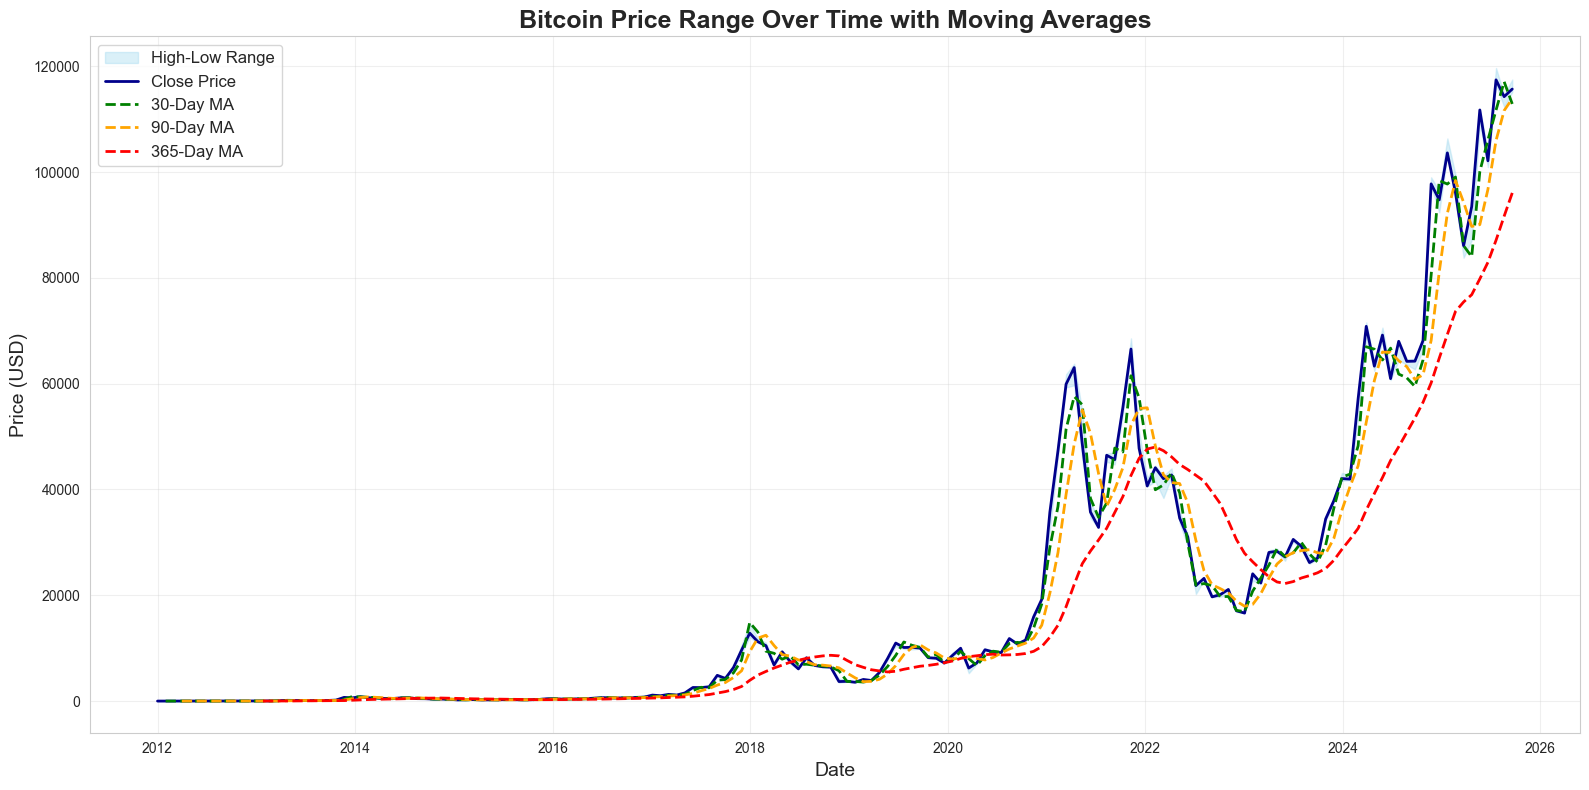

In [12]:
# Calculate moving averages
data_daily['MA_30'] = data_daily['Close'].rolling(window=30).mean()
data_daily['MA_90'] = data_daily['Close'].rolling(window=90).mean()
data_daily['MA_365'] = data_daily['Close'].rolling(window=365).mean()
data_monthly = data_daily.iloc[::30].copy()

plt.figure(figsize=(16, 8))
plt.fill_between(data_monthly.index, data_monthly['Low'], data_monthly['High'], 
                 alpha=0.3, label='High-Low Range', color='skyblue')
plt.plot(data_monthly.index, data_monthly['Close'], 
         linewidth=2, label='Close Price', color='darkblue')
plt.plot(data_monthly.index, data_monthly['MA_30'], 
         linewidth=2, label='30-Day MA', color='green', linestyle='--')
plt.plot(data_monthly.index, data_monthly['MA_90'], 
         linewidth=2, label='90-Day MA', color='orange', linestyle='--')
plt.plot(data_monthly.index, data_monthly['MA_365'], 
         linewidth=2, label='365-Day MA', color='red', linestyle='--')
plt.title('Bitcoin Price Range Over Time with Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()